In [55]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#read the data from drive
data=pd.read_csv(r"E:\School_DataSets\chip_dataset.csv")


In [57]:
data

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00


In [58]:
data.tail()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00
4944,NVIDIA RTX 5880 Ada Generation,GPU,1/5/24,5,285,609,76300,1155.0,TSMC,NVIDIA,71810.0,71810.0,1122.00


## Explore the missingness in the dataset for categorical and numerical data


In [59]:
#Exploring missingness with pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [60]:
data.shape

(4945, 13)

In [61]:
data.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

##### Several columns have missing values Release Date, TDP, Die size, Transistors, Frequency, Foundry, FP16, FP32, FP64.
##### use missingno library to identify any patterns in the data that could explain the missingness

In [62]:
!pip install missingno

In [63]:
import missingno as mn

<Axes: >

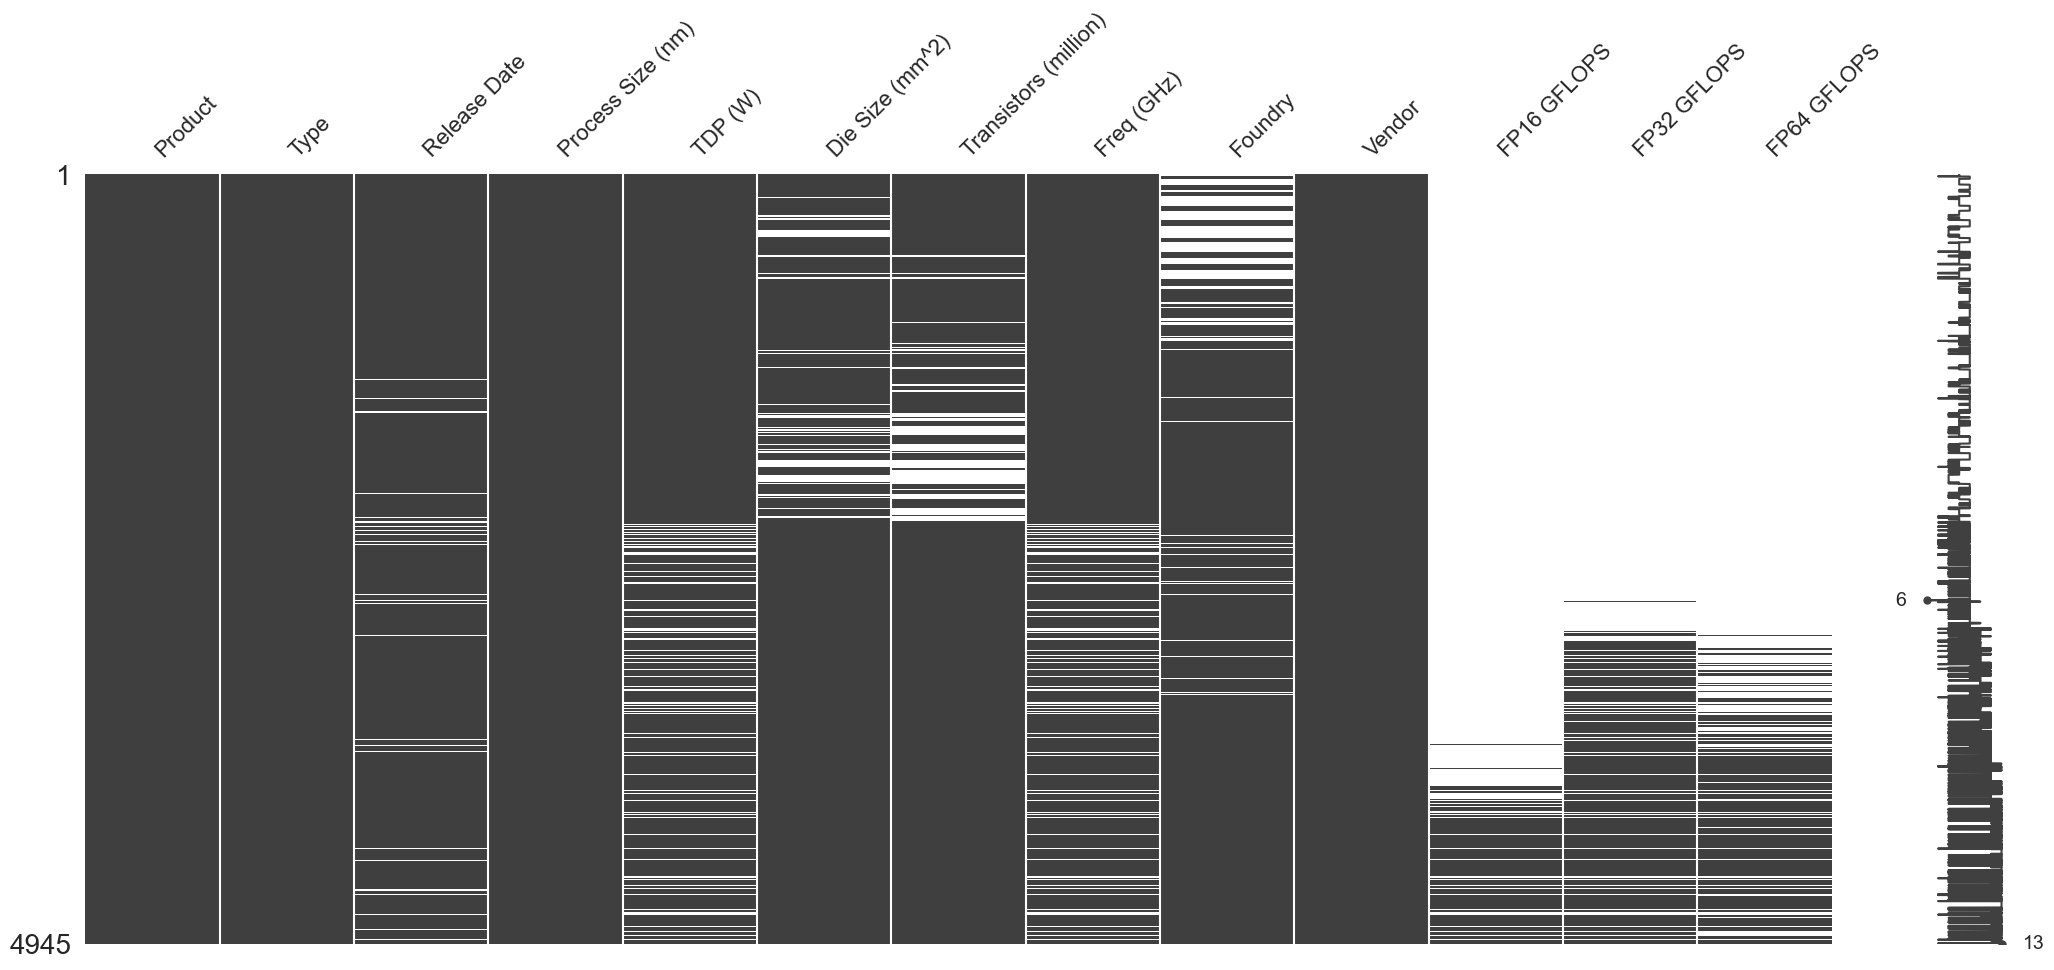

In [64]:
mn.matrix(data)

### Q1 :Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.


#### Step 1, drop unnecessary columns

In [65]:
#drop the last 3 columns since more that 50% missing data
data.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'],axis=1,inplace=True)

In [66]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD


#### Imputing release date missingness

In [67]:
#convert to date time data type
data['Release Date'] = pd.to_datetime(data['Release Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_1748\2226359446.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Release Date'] = pd.to_datetime(data['Release Date'])


In [68]:
#use back filling to impute missing release dates
data['Release Date'] = data['Release Date'].fillna(method='bfill')

C:\Users\User\AppData\Local\Temp\ipykernel_1748\821078819.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Release Date'] = data['Release Date'].fillna(method='bfill')


In [69]:
data.isnull().sum()

Product                    0
Type                       0
Release Date               0
Process Size (nm)          0
TDP (W)                  437
Die Size (mm^2)          352
Transistors (million)    555
Freq (GHz)               437
Foundry                  615
Vendor                     0
dtype: int64

#### Dealing with missingness in the TDP (w), Transistors.... First plot distributions of each to identify best imputation strategy

In [70]:
data.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor'],
      dtype='object')

In [71]:
#convert all object type columns to numerical columns
data[['TDP (W)','Die Size (mm^2)','Transistors (million)']]=data[['TDP (W)','Die Size (mm^2)','Transistors (million)']].apply(pd.to_numeric,errors='coerce')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4054 non-null   float64       
 5   Die Size (mm^2)        4229 non-null   float64       
 6   Transistors (million)  4139 non-null   float64       
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 386.5+ KB


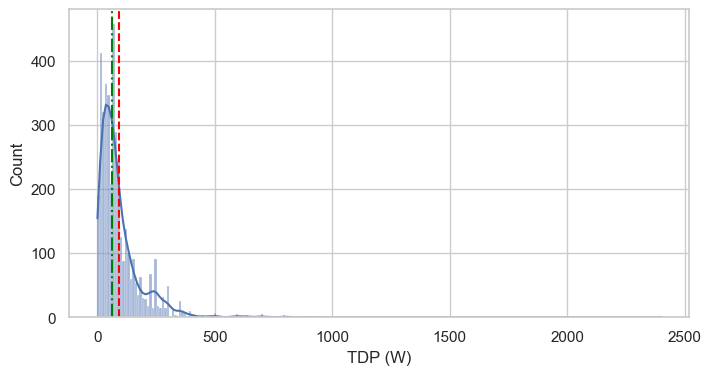

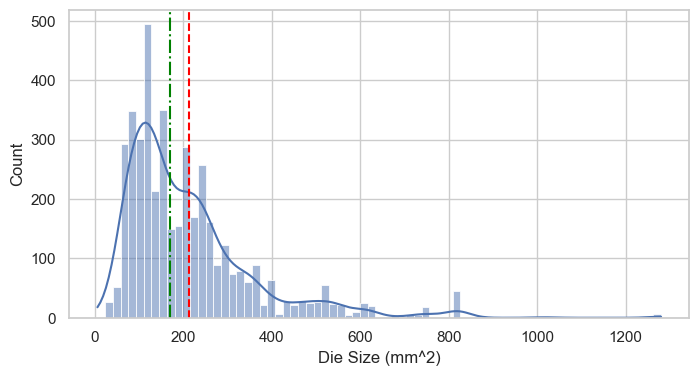

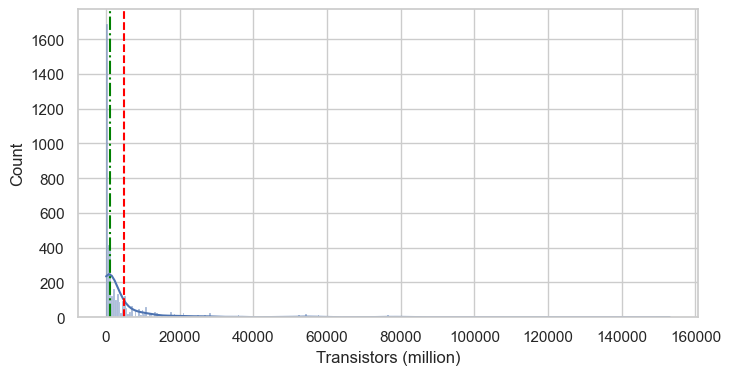

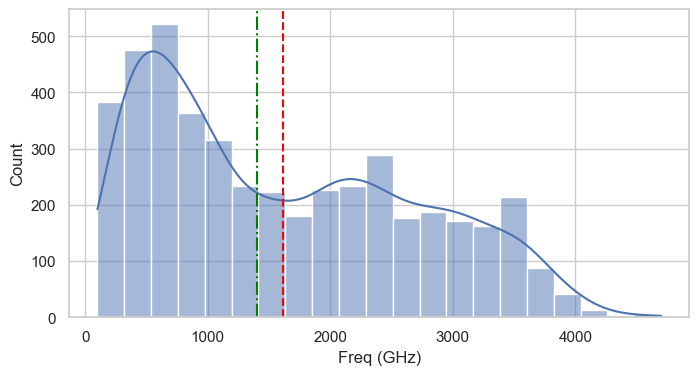

In [76]:
numerical_cols=['TDP (W)','Die Size (mm^2)','Transistors (million)','Freq (GHz)']

for num_col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data,x=num_col,kde=True)

    col_mean = data[num_col].mean()
    col_median = data[num_col].median()

    plt.axvline(col_mean, color='red', linestyle='--',)
    plt.axvline(col_median, color='green', linestyle='-.')
    

#### For all numerical missing data, impute using median values as they are better measures of central tendancy

In [82]:
data['TDP (W)'].fillna((data['TDP (W)'].median()), inplace=True) 
data['Die Size (mm^2)'].fillna((data['Die Size (mm^2)'].median()), inplace=True) 
data['Transistors (million)'].fillna((data['Transistors (million)'].median()), inplace=True) 
data['Freq (GHz)'].fillna((data['Freq (GHz)'].median()), inplace=True) 
data['Foundry'].fillna(data['Foundry'].mode()[0], inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_1748\2984975273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TDP (W)'].fillna((data['TDP (W)'].median()), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1748\2984975273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [83]:
data.isnull().sum()

Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (GHz)               0
Foundry                  0
Vendor                   0
dtype: int64

## Drop non-consequntial fields


In [ ]:
#done above

## Transform temporal data to their corrrect format (date time)


In [ ]:
#done above

## Perfom a full EDA and demonstrate the validity of the following assumption

#### Moore's Law holds especially in GPUs

In [84]:
#Moore's law= the no. of transistors doubles every year
#plot graph of transistors(million) over the years
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,TSMC,AMD


C:\Users\User\AppData\Local\Temp\ipykernel_1748\101165064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPU_df['Year'] = CPU_df['Release Date'].dt.year


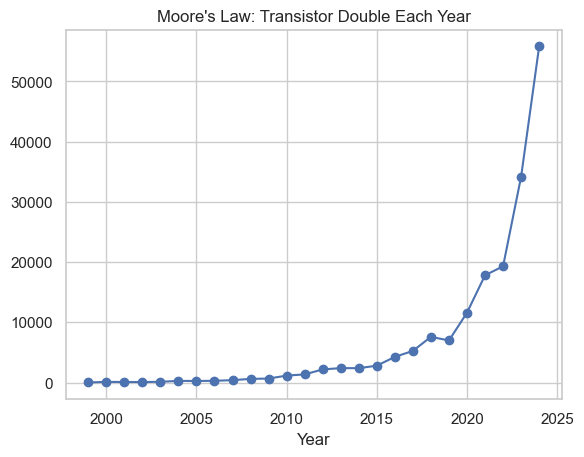

In [87]:
CPU_df=data.loc[data['Type']=='GPU']
CPU_df['Year'] = CPU_df['Release Date'].dt.year
CPU_df.groupby('Year')['Transistors (million)'].mean().plot(kind='line', marker='o', title="Moore's Law: Transistor Double Each Year")
plt.show()

#### Dannard Scaling is still valid in general.

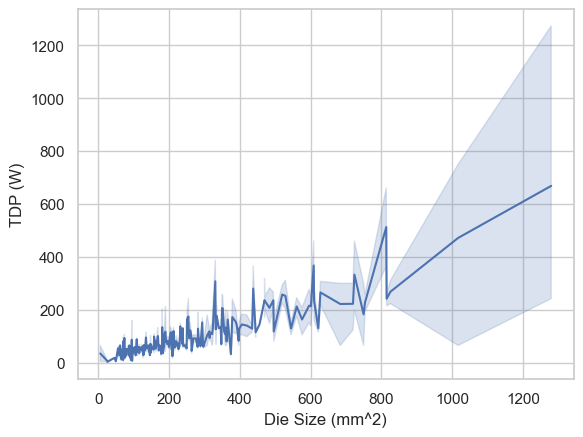

In [88]:
#as transistors get smaller they become more efficient- generate less heat
#plot size of transistors against heat generated
sns.lineplot(x='Die Size (mm^2)', y='TDP (W)', data=data) 
plt.show()

#### CPUs have higher frequencies, but GPUs are catching up.

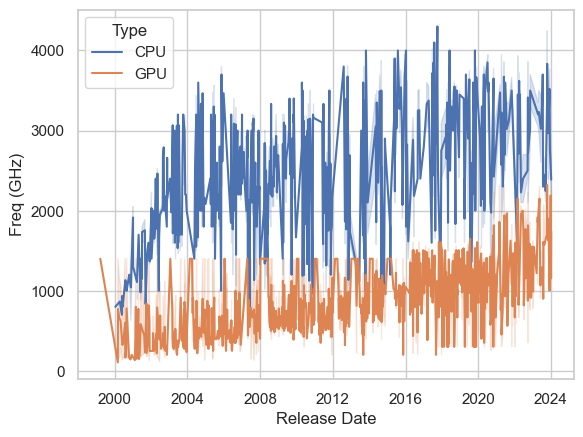

In [91]:
sns.lineplot(x='Release Date',y='Freq (GHz)', data=data,hue='Type') 
plt.show()

In [ ]:
CPU_df=data.loc[data['Type']=='GPU']
CPU_df['Year'] = CPU_df['Release Date'].dt.year
CPU_df.groupby('Year')['Transistors (million)'].mean().plot(kind='line', marker='o', title="Moore's Law: Transistor Double Each Year")
plt.show()